In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.ndimage.filters as filters

from matplotlib.colors import LinearSegmentedColormap
from skimage import io
from skimage.color import rgb2gray

In [29]:
# Generate dummy coordinate csv.

coords = [(random.randint(0, x_dim), random.randint(0, y_dim)) for _ in range(5000)]
pd.DataFrame(coords).to_csv("obarey.csv")

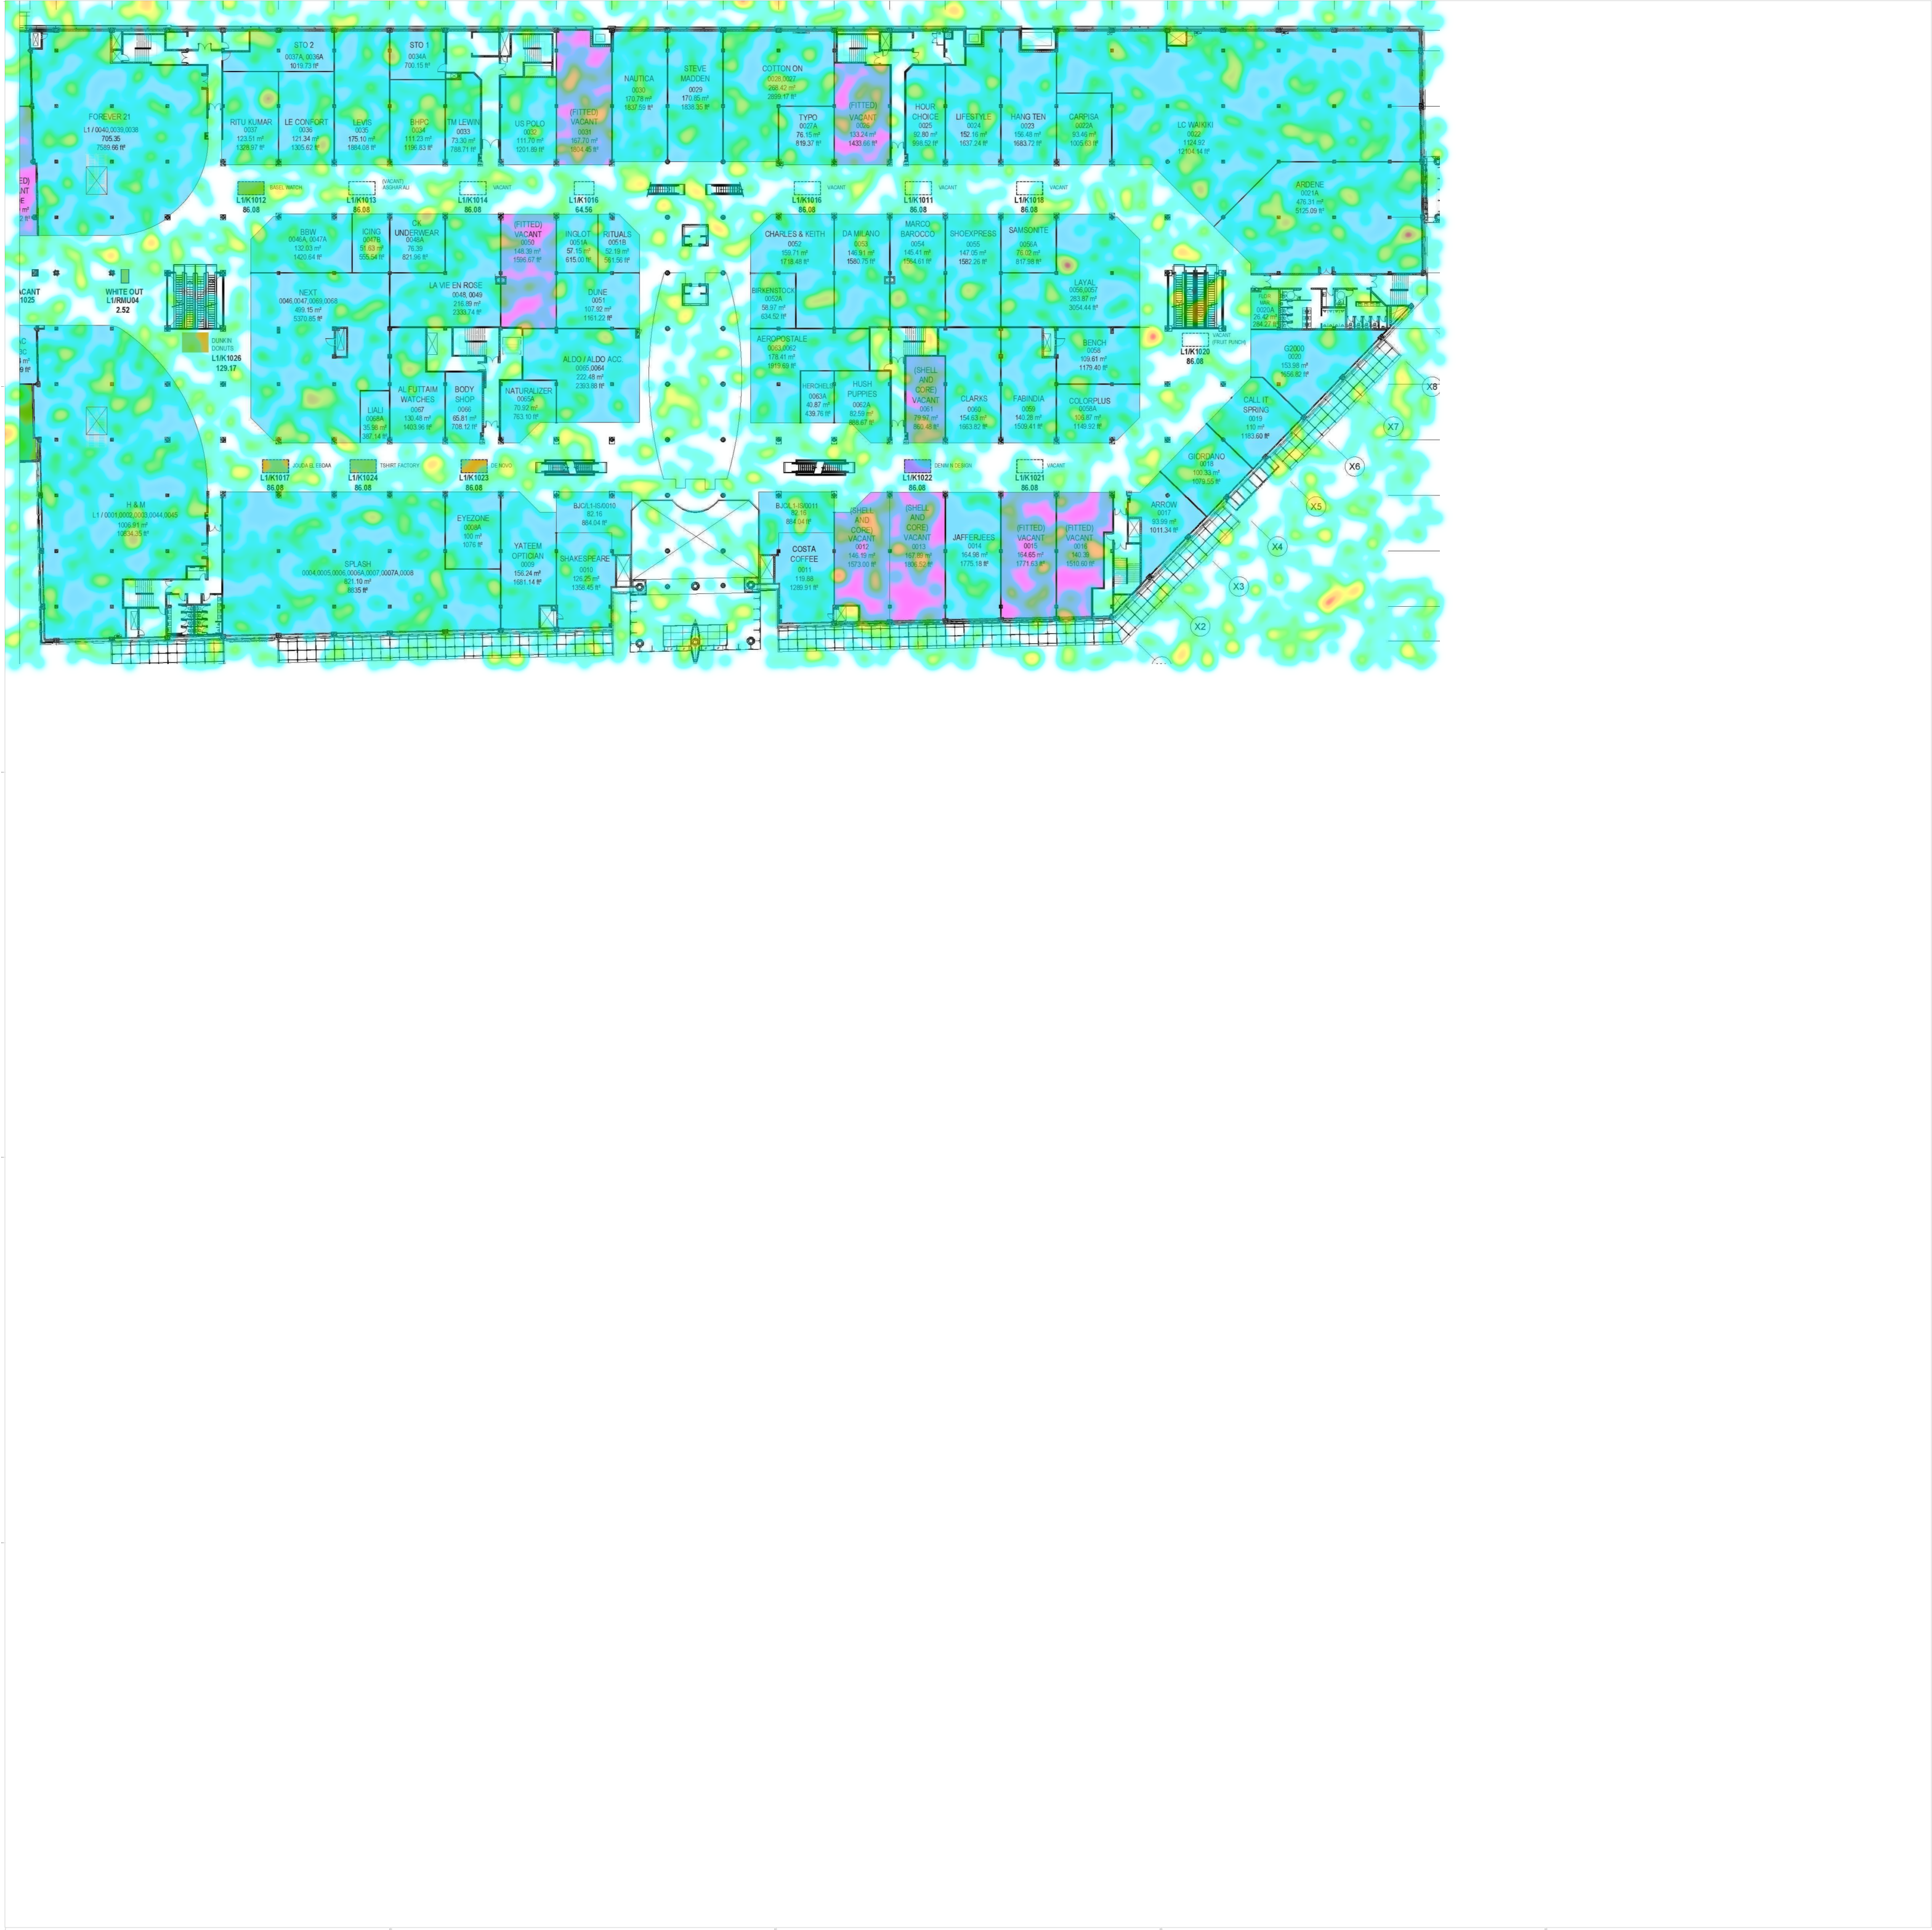

In [30]:
# Load floor plan
img = io.imread('burj_1.jpg')

# Get floor plan image sizes
x_dim, y_dim, z_dim = np.shape(img)

# Figsize uses inches to show images we need these to show image in correct size.
pixInInch = 0.0104166667;
dpi = 15

# Data array initialization
data = np.zeros((5000, 5000), dtype=float)

# Read data CSV
df = pd.read_csv("obarey.csv")

for index, row in df.iterrows():
    x = np.int(row[1])
    y = np.int(row[2])
    data[x,y] = 1


# Smooth it to create a "blobby" look
data = filters.gaussian_filter(data, sigma=15)

# Heat map colors cold to hot.
colors = [(1,1,1,0), (0, 1, 1), (0, 1, 0.75), (0, 1, 0), (0.75, 1, 0),
          (1, 1, 0), (1, 0.8, 0), (1, 0.7, 0), (1, 0, 0)]

# Plot action
cm = LinearSegmentedColormap.from_list('sample', colors)
plt.figure(figsize = (x_dim * pixInInch * dpi, y_dim * pixInInch * dpi), dpi=dpi)
plt.imshow(img)
plt.imshow(data, cmap=cm, alpha=.5, )
#plt.axis('off')
plt.savefig('alo.png')